Введите количество городов:
4
Введите расстояния между городами
Bводите расстояния построчно, составляя матрицу расстойний между городами
0 0 3 0
0 0 6 5
3 6 0 4
0 5 4 0
Вы ввели матрицу:

+---+---+---+---+---+
|   | 1 | 2 | 3 | 4 |
+---+---+---+---+---+
| 1 | 0 | 0 | 3 | 0 |
| 2 | 0 | 0 | 6 | 5 |
| 3 | 3 | 6 | 0 | 4 |
| 4 | 0 | 5 | 4 | 0 |
+---+---+---+---+---+
Все пермещения между островками:
(1, 2, 3, 4) Путь невозможен
(1, 2, 4, 3) Путь невозможен
(1, 3, 2, 4) 14
(1, 3, 4, 2) 12
(1, 4, 2, 3) Путь невозможен
(1, 4, 3, 2) Путь невозможен
(2, 1, 3, 4) Путь невозможен
(2, 1, 4, 3) Путь невозможен
(2, 3, 1, 4) Путь невозможен
(2, 3, 4, 1) Путь невозможен
(2, 4, 1, 3) Путь невозможен
(2, 4, 3, 1) 12
(3, 1, 2, 4) Путь невозможен
(3, 1, 4, 2) Путь невозможен
(3, 2, 1, 4) Путь невозможен
(3, 2, 4, 1) Путь невозможен
(3, 4, 1, 2) Путь невозможен
(3, 4, 2, 1) Путь невозможен
(4, 1, 2, 3) Путь невозможен
(4, 1, 3, 2) Путь невозможен
(4, 2, 1, 3) Путь невозможен
(4, 2, 3, 1) 14
(4, 3, 1, 2) Пут

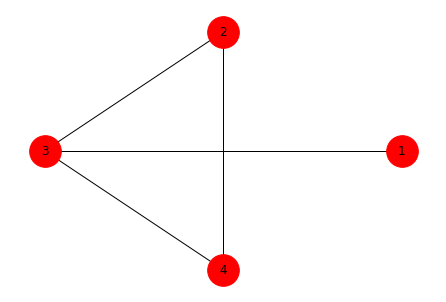

In [30]:
from prettytable import PrettyTable
import itertools
import matplotlib.pyplot as plt
import itertools
import networkx as nx

%matplotlib inline

#ввод матрицы построчно и вывод с помощью библиотеки PrettyTable
print("Введите количество городов:")
towns = int(input())
print("Введите расстояния между городами\nBводите расстояния построчно, составляя матрицу расстойний между городами")
towns_distances = []
mytable = PrettyTable()
numbers = [' ']
for i in range(1, towns+1):
    numbers.append(str(i))
mytable.field_names = numbers
for i in range(towns):
    a = input().split(sep=None, maxsplit=-1)
    a.insert(0, str(i+1))
    a = list(map(int, a))
    mytable.add_row(a)
    towns_distances.append(a)
print("Вы ввели матрицу:\n")
print(mytable)

val = []
for i in range(1, towns+1):
    val.append(int(i))
#перестановки вариантов путей с помощью модуля itertools
distances = itertools.permutations(val)
print("Все пермещения между островками:")
values = [] #массив с длинами всех путей
for i in distances:
    leng = 0
    for j in range(len(i)-1):
        if towns_distances[i[j]-1][i[j+1]] == 0:
            leng = "Путь невозможен"
            break
        else:
            leng += int(towns_distances[i[j]-1][i[j+1]])
    values.append(leng)
    print(f"{i} {leng}")
numb = -1
for i in range(len(values)):
    if str(values[i]).isnumeric() == False:
        values[i]=0
distances = itertools.permutations(val)
mi = min(i for i in values if i > 0)
for i in distances:
    numb+=1
    if mi==values[numb]:
        min_distance = i
        break
print(f"Минимальный маршрут {min_distance} имеет длину {mi}")

numbers.pop(0)
distances = itertools.permutations(val)
graph = nx.Graph()
for i in range(len(numbers)):
    graph.add_node(numbers[i])

def add_edge(f_item, s_item, graph=None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item)

#вывод на экран
distances = itertools.permutations(val)
for i in distances:
    if towns_distances[i[0]-1][i[1]] != 0:
        add_edge(str(i[0]), str(i[1]), graph=graph)
nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

In [1]:
#4 0 0 3 0    0 0 6 5    3 6 0 4    0 5 4 0

Задайте количество вершин:
4
0 5 3 8
5 0 6 2
3 6 0 7
8 2 7 0
Координаты вершин:
 [[0.99030878 0.75011384]
 [0.61110678 0.1788076 ]
 [0.87006393 0.4529291 ]
 [0.78401528 0.70536043]] 

Матрица расстояний:
 [[0 5 3 8]
 [5 0 6 2]
 [3 6 0 7]
 [8 2 7 0]]
Введите количество муравьев:2
Введите количество итераций:10


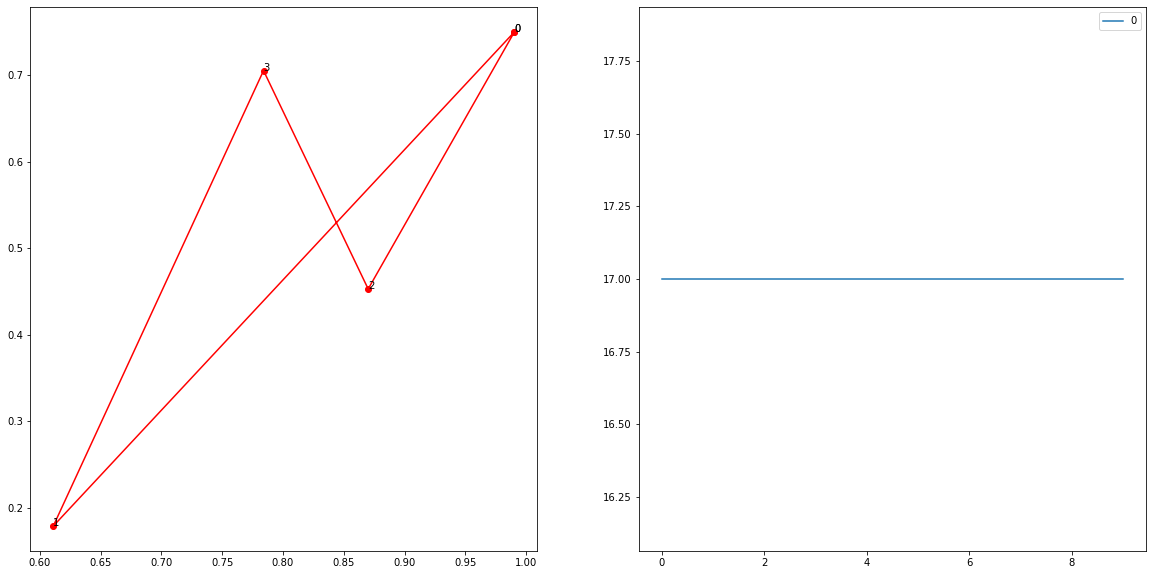

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# класс алгоритма муравьиной колонии
class ant_colony:
    def __init__(self, func, cities, ants=10, iterations=20, distance_matrix=None, alpha=1, beta=2, speed=0.1):
        self.func = func #func передает функцию для подсчета длины путей (функция ниже по коду)
        self.cities = cities  # количество городов
        self.ants = ants  # количество муравьёв
        self.iterations = iterations  # количество итераций
        self.alpha = alpha  # коэффициент важности феромонов в выборе пути
        self.beta = beta  # коэффициент значимости расстояния
        self.speed = speed  # скорость испарения феромонов

        self.test_matrix_distance = 1 / (distance_matrix + 1e-10 * np.eye(cities, cities))

        # Матрица феромонов, обновляющаяся каждую итерацию
        self.ph_matrix = np.ones((cities, cities))
        # Путь каждого муравья в определённом поколении
        self.way = np.zeros((ants, cities)).astype(int)
        self.y = None  # Общее расстояние пути муравья в определённом поколении
        # фиксирование лучших поколений
        self.generation_best_X, self.generation_best_Y = [], [] 
        self.x_best_history, self.y_best_history = self.generation_best_X, self.generation_best_Y
        self.best_x, self.best_y = None, None
    
    #запустили муравьев
    def run(self, iterations=None):
        for i in range(self.iterations):
            # вероятность перехода без нормализации
            prob_matrix = (self.ph_matrix ** self.alpha) * (self.test_matrix_distance) ** self.beta
            # для каждого муравья
            for j in range(self.ants):  
                # точка начала пути
                self.way[j, 0] = 0
                for k in range(self.cities - 1):  # каждая вершина, которую проходят муравьи
                    # точка, которая была пройдена и не может быть пройдена повторно
                    point = set(self.way[j, :k + 1])
                    # список разрешённых вершин, из которых будет происходить выбор
                    allow_list = list(set(range(self.cities)) - point)
                    prob = prob_matrix[self.way[j, k], allow_list]
                    prob = prob / prob.sum() # нормализация вероятности
                    next_point = np.random.choice(allow_list, size=1, p=prob)[0]
                    self.way[j, k + 1] = next_point

            # рассчёт расстояния
            y = np.array([self.func(i) for i in self.way])

            # фиксация лучшего решения
            # Возвращает индексы минимального значения в массиве у
            index_best = y.argmin()
            x_best, y_best = self.way[index_best, :].copy(), y[index_best].copy()
            self.generation_best_X.append(x_best)
            self.generation_best_Y.append(y_best)

            # подсчёт феромона, который будет добавлен к ребру
            delta_ph_matrix = np.zeros((self.cities, self.cities))
            for j in range(self.ants):  # для каждого муравья
                for k in range(self.cities - 1):  # для каждой вершины
                    # муравьи перебираются из вершины n1 в вершину n2
                    n1, n2 = self.way[j, k], self.way[j, k + 1]
                    delta_ph_matrix[n1, n2] += 1 / y[j]  # нанесение феромона
                # муравьи ползут от последней вершины обратно к первой
                n1, n2 = self.way[j, self.cities - 1], self.way[j, 0]
                delta_ph_matrix[n1, n2] += 1 / y[j]  # нанесение феромона

            self.ph_matrix = (1 - self.speed) * self.ph_matrix + delta_ph_matrix

        best_generation = np.array(self.generation_best_Y).argmin()
        self.best_x = self.generation_best_X[best_generation]
        self.best_y = self.generation_best_Y[best_generation]
        return self.best_x, self.best_y

print("Задайте количество вершин:")
num_points = int(input()) # количество вершин
points_coordinate = np.random.rand(num_points, 2)  # генерация координат вершин

# вычисление матрицы расстояний между вершин
distance_matrix = np.asarray(list(map(int, input().split(sep=" "))))
for i in range(num_points-1):
    b = np.asarray(list(map(int, input().split(sep=" "))))
    distance_matrix = np.vstack((distance_matrix, b))

print("Координаты вершин:\n", points_coordinate[:10], "\n")
print("Матрица расстояний:\n", distance_matrix)

# вычисление длины пути
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

def main():
    a_in = int(input("Введите количество муравьев:"))
    iter_in = int(input("Введите количество итераций:"))
    # создание объекта алгоритма муравьиной колонии
    aca = ant_colony(func=cal_total_distance, cities=num_points,
                  ants=a_in, # количество муравьёв
                  iterations=iter_in, distance_matrix=distance_matrix)
    best_x, best_y = aca.run()

    # Вывод результатов на экран
    fig, ax = plt.subplots(1, 2)
    best_points_ = np.concatenate([best_x, [best_x[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]
    for index in range(0, len(best_points_)):
        ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
    ax[0].plot(best_points_coordinate[:, 0],
               best_points_coordinate[:, 1], 'o-r') #линия с вершинами-точками
    # Pandas dataframe.cummin() используется, чтобы найти совокупное минимальное значение по любой оси
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
    # изменение размера графиков
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.show()

if __name__ == "__main__":
    main()